<a href="https://colab.research.google.com/github/vmpreciado/NETS3120/blob/main/FBClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook to play with the Facebook subgraph dowloaded from the SNAP library...

In [1]:
# Import necessary libraries
from google.colab import drive
import networkx as nx

# Mount Google Drive
drive.mount('/content/drive')

# Path to your file on Google Drive: 1) Download facebook_combined.txt.gz; 2) Decompressed as a .txt; 3) Rename and locate wherever you like...
file_path = '/content/drive/My Drive/ColabNotebooks/FacebookSmall.txt'

# Create a new graph and name it FB
FB = nx.Graph()# Create a graph from the edgelist file
FB = nx.read_edgelist(file_path, create_using=nx.Graph(), nodetype=int)

# Perform initial checks
print(f"Number of nodes: {FB.number_of_nodes()}")
print(f"Number of edges: {FB.number_of_edges()}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Number of nodes: 4039
Number of edges: 88234


Let's compute a sequence of clustering coefficients for each node. Let's plot a histogram of the values and the total average in the graph. (By convention, isolated nodes have a clustering coefficient equal to zero.)

Average Clustering Coefficient: 0.6055467186200876


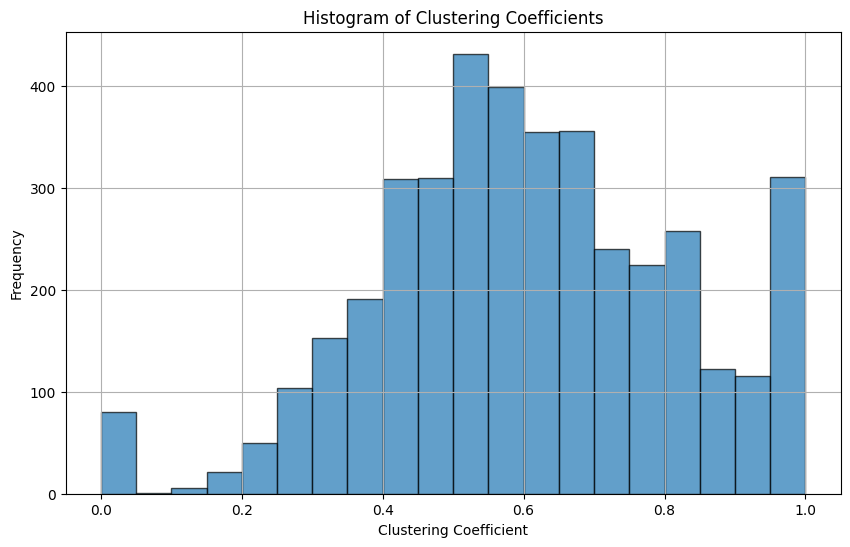

In [2]:
import matplotlib.pyplot as plt

# Computing clustering coefficients for each node
clustering_coefficients = nx.clustering(FB)
clustering_coefficients_list = list(clustering_coefficients.values()) # transform into a list for convenience

# Computing the average clustering coefficient
average_clustering_coefficient = nx.average_clustering(FB)
print(f"Average Clustering Coefficient: {average_clustering_coefficient}")

# Create a histogram of the clustering coefficients
plt.figure(figsize=(10, 6))
plt.hist(clustering_coefficients_list, bins=20, edgecolor='black', alpha=0.7)

plt.title('Histogram of Clustering Coefficients')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

This is a very high average clustering coefficient, indicating that the subgraph of facebook we are analyzing is part of a community. The average clustering coefficient equal to 0.60 can be interpreted as follows: The probability of two random friends of a random node being connected is approx 60%

For each node, let's compare the total number of pairs of friends and the number of those pairs that are connected (this number is equal to the number of edges in the ego-network)

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Computing the degree of each node
degrees = dict(FB.degree())

# Function to compute "n choose 2" divided by 3
def n_choose_2(n):
    return n * (n - 1) // 2

# Lists to store our x and y values for the plot
x_values, y_values = [], []

for node in FB.nodes():
    degree = degrees[node]  # Degree of the node
    ego_graph = nx.ego_graph(FB, node)  # Ego graph of the node
    num_edges_ego_graph = ego_graph.number_of_edges() - degree  # Subtract the node's own edges

    x_val = n_choose_2(degree)
    # Handling zero values by adding a small constant (1e-10)
    x_val = x_val if x_val > 0 else 1e-10
    y_val = num_edges_ego_graph if num_edges_ego_graph > 0 else 1e-10

    x_values.append(x_val)
    y_values.append(y_val)


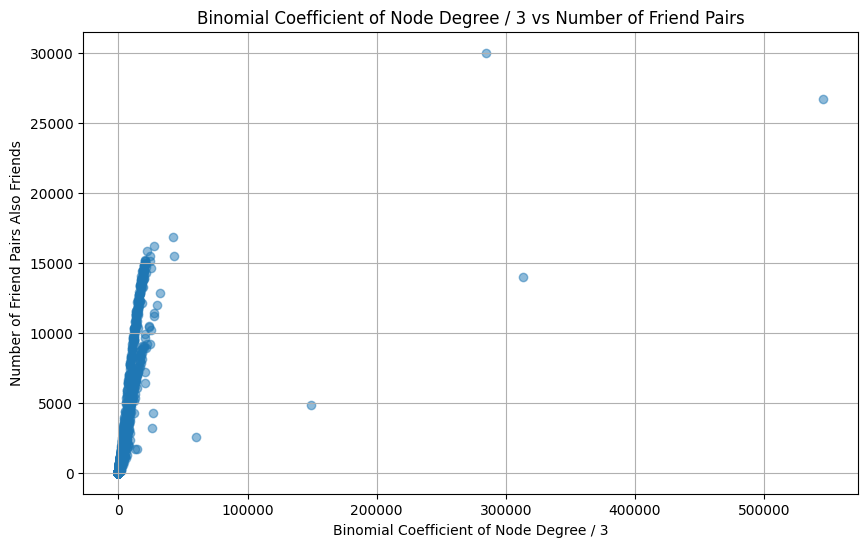

In [4]:
# Creating the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, alpha=0.5)
plt.title('Binomial Coefficient of Node Degree / 3 vs Number of Friend Pairs')
plt.xlabel('Binomial Coefficient of Node Degree / 3')
plt.ylabel('Number of Friend Pairs Also Friends')
plt.grid(True)
plt.show()

Since the values span several orders of magniture, let's make the plot easier on the eyes by applying a log-log transformation...

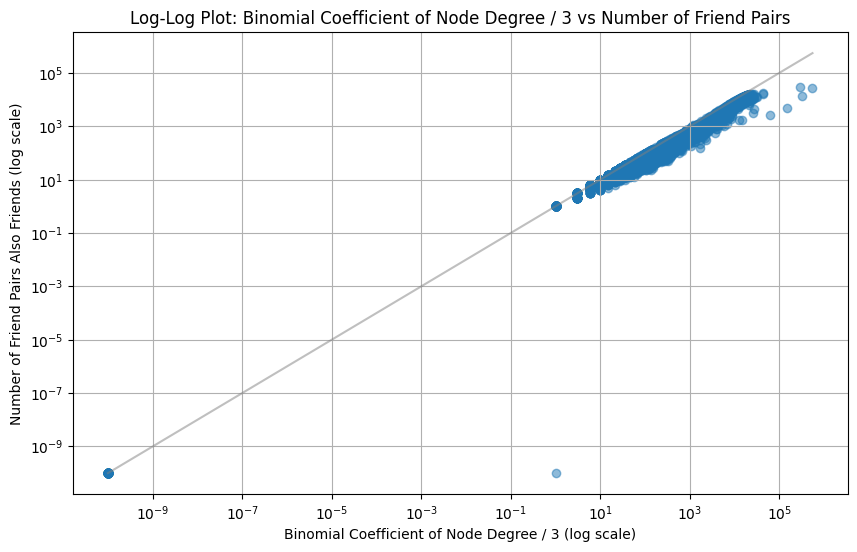

In [5]:
# Creating the log-log scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, alpha=0.5)

# Adding a diagonal line
min_val = min(min(x_values), min(y_values))
max_val = max(max(x_values), max(y_values))
plt.plot([min_val, max_val], [min_val, max_val], color='gray', alpha=0.5)

plt.xscale('log')
plt.yscale('log')
plt.title('Log-Log Plot: Binomial Coefficient of Node Degree / 3 vs Number of Friend Pairs')
plt.xlabel('Binomial Coefficient of Node Degree / 3 (log scale)')
plt.ylabel('Number of Friend Pairs Also Friends (log scale)')
plt.grid(True)
plt.show()